Episode 0


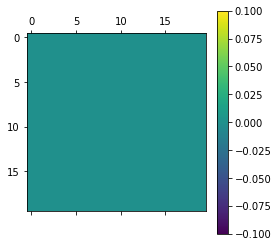

Episode 20


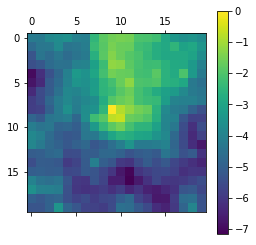

Episode 40


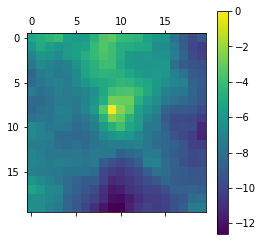

Episode 60


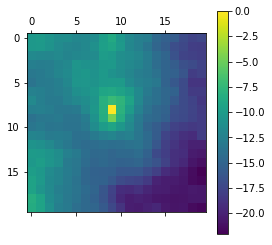

Episode 80


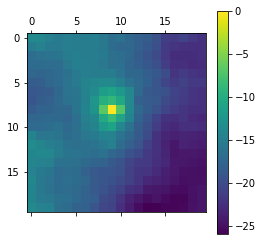

Episode 100


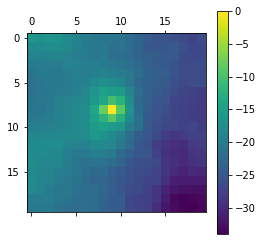

Episode 120


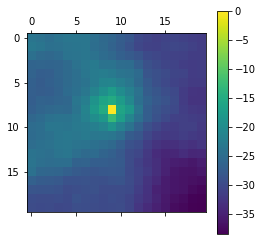

Episode 140


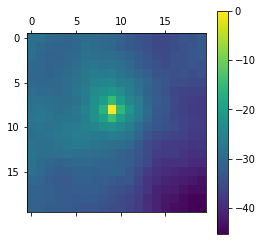

Episode 160


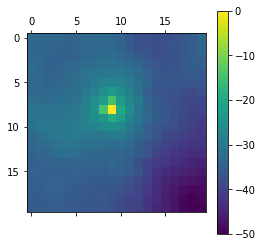

Episode 180


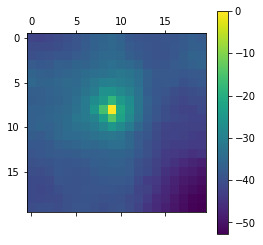

Episode 200


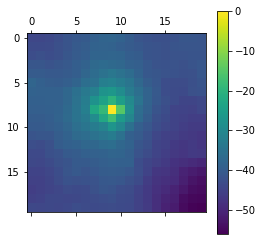

Episode 220


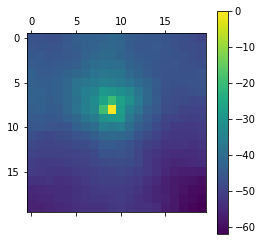

Episode 240


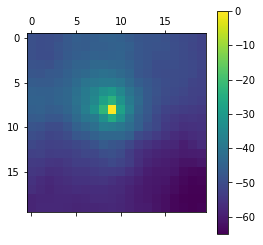

Episode 260


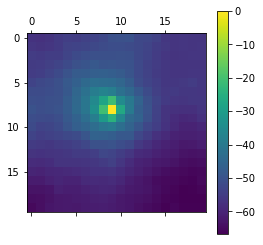

Episode 280


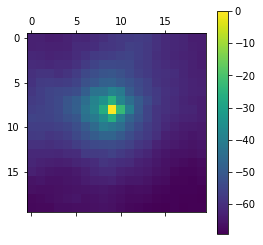

Episode 300


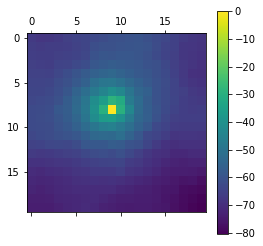

Episode 320


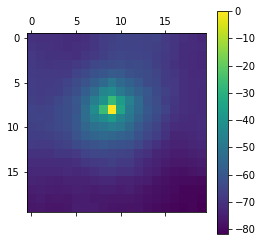

Episode 340


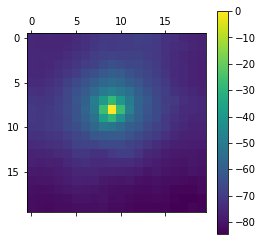

Episode 360


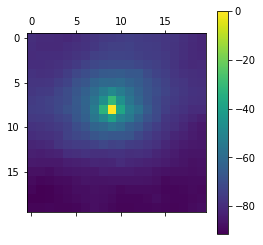

Episode 380


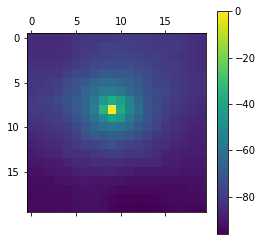

Episode 400


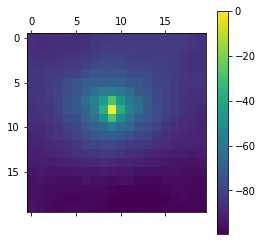

Episode 420


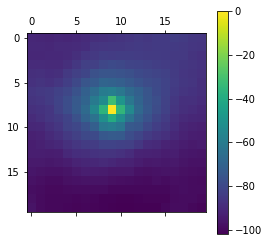

Episode 440


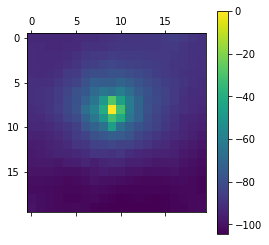

Episode 460


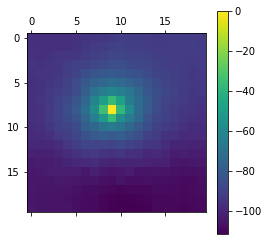

Episode 480


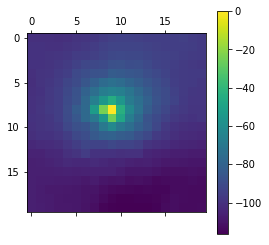

Episode 500


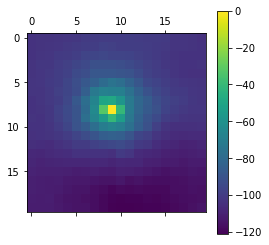

In [2]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np

from myelin.agents import TabularTD0
from myelin.core import RLInteraction, MDPEnvironment
from myelin.mdps.gridworld import GridWorld
from myelin.policies import RandomPolicy
from myelin.utils import Callback

ROWS = 20
COLS = 20

mdp = GridWorld(ROWS, COLS)
env = MDPEnvironment(mdp)
policy = RandomPolicy(env.action_space)
vf = np.zeros((ROWS, COLS))
agent = TabularTD0(policy, vf)


def show_value_function(vf):
    np.set_printoptions(precision=4, linewidth=200)
    plt.matshow(vf)
    plt.colorbar()
    plt.show()

    
class Monitor(Callback):
    def on_episode_begin(self, episode):
        if episode % 20 == 0:
            print('Episode {}'.format(episode))
            show_value_function(vf)

    def on_train_end(self, episode):
        print('Episode {}'.format(episode))
        show_value_function(vf)


RLInteraction(env, agent).train(500, callbacks=[Monitor()])